In [3]:
from gaussian_process.regression import ExactGPR
from gaussian_process.kernels import RBF
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt

In [4]:
# model = GaussianProcessRegressor(RBF(),1,(1,))

In [5]:
# X_data = jnp.ones((2,2))
# Y_data = jnp.ones((2,2))

# model.fit(X_data,Y_data)

In [6]:
# X = jnp.zeros((1,2))
# model.predict(X,True)

In [7]:
# a = jnp.arange(10,dtype=jnp.float32) // 3
# a = a.astype(jnp.int32)

In [8]:
# a.dtype

In [9]:
from jax import vmap
from functools import partial
from gaussian_process.kernels import RBF
from jax.scipy.linalg import solve

In [10]:
X = jnp.arange(5,dtype=jnp.float32).reshape(-1,1)
Y = jnp.arange(5,dtype=jnp.float32).reshape(-1,1)

In [11]:
class Test:
    def __init__(self) -> None:
        self.kernel = RBF()

    @partial(vmap, in_axes=(None,0,None,None))
    @partial(vmap, in_axes=(None,None,0,None))
    def f(self,x,y,index):
        return self.kernel.eval_dx2(x,y,index)

In [12]:
T = Test()
print(T.f(X,X,0))

[[ 0.         -0.60653067 -0.27067056 -0.03332699 -0.00134185]
 [ 0.60653067  0.         -0.60653067 -0.27067056 -0.03332699]
 [ 0.27067056  0.60653067  0.         -0.60653067 -0.27067056]
 [ 0.03332699  0.27067056  0.60653067  0.         -0.60653067]
 [ 0.00134185  0.03332699  0.27067056  0.60653067  0.        ]]


In [13]:
x = jnp.arange(20).reshape(4,5)
A = jnp.eye(5)*2

In [14]:
@partial(vmap, in_axes=(None,0))
def f(A,x):
    # A = jnp.eye(5)*2
    return x@solve(A,x)

In [15]:
print(f(A,x))

[ 15.  127.5 365.  727.5]


In [16]:
print(x)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


In [17]:
test = []
for elem in x:
    test.append(jnp.sum(elem**2))
test = jnp.array(test)

In [18]:
print(test/2)

[ 15.  127.5 365.  727.5]


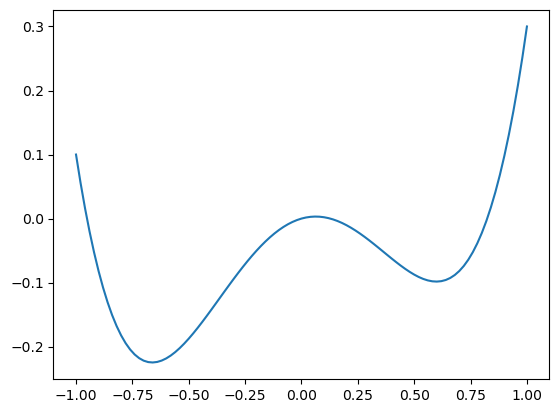

In [29]:
X = jnp.linspace(-1,1,101)
Y = X**4 - 0.8*X**2 + 0.1*X

plt.plot(X,Y)